Regression Coefficient (X): 0.7247687016181724
Intercept: 0.14170387223712
Mean Squared Error: 0.5901463943118466
R2 Score (Model Accuracy): 0.6662585264508232

New Instances X: [ 5 10]
Predicted Output YHAT: [3.76554738 7.38939089]
Mean of Actual Y Values: 3.392859263581404
YHAT - Y for new instances: [0.37268812 3.99653162]
Square (YHAT - Y) for new instances: [ 0.13889643 15.97226503]
Average (Sum (Square (YHAT - Y))): 8.055580730344953


C:\Users\VIKAS KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


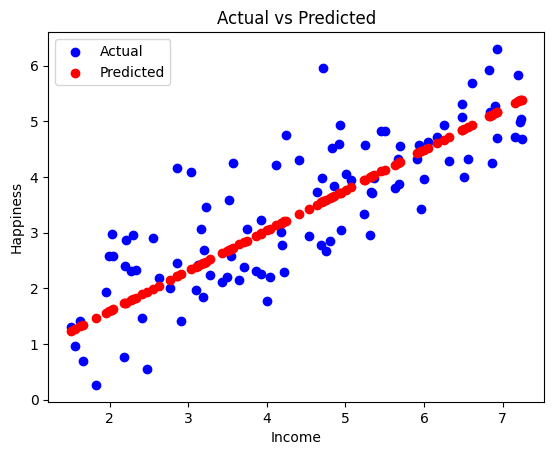

In [9]:
#Income dataset -SLR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_name = 'income.csv'  # Change to your file name
data = pd.read_csv(file_name)

# Assuming the dataset has columns 'income' (independent variable) and 'happiness' (dependent variable)
X = data[['income']]
y = data['happiness']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print regression coefficients and metrics
print(f'Regression Coefficient (X): {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score (Model Accuracy): {r2}')

# New instances for prediction
X_new = np.array([[5], [10]])  # Replace with your new instances
y_new_pred = model.predict(X_new)

# Print predictions for new instances
print(f'\nNew Instances X: {X_new.flatten()}')
print(f'Predicted Output YHAT: {y_new_pred}')

# Calculate additional metrics for new instances
# Get the mean of actual y values from the original dataset
y_mean = np.mean(y)
print(f"Mean of Actual Y Values: {y_mean}")

# Calculate YHAT - Y and squared errors for new instances
y_new_errors = y_new_pred - y_mean
squared_errors_new = y_new_errors ** 2
average_squared_error = np.mean(squared_errors_new)

print(f'YHAT - Y for new instances: {y_new_errors}')
print(f'Square (YHAT - Y) for new instances: {squared_errors_new}')
print(f'Average (Sum (Square (YHAT - Y))): {average_squared_error}')

# Plot actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


Regression Coefficients (Theta): [0.7379784]
Intercept: 0.07379513639298015
Mean Squared Error: 0.5962593272473221
R2 Score (Model Accuracy): 0.6628015210954454

New Instances X: [ 5. 10.]
Predicted Output YHAT: [3.76368713 7.45357912]
YHAT - Y for new instances: [0.37082786 4.06071986]
Square (YHAT - Y) for new instances: [ 0.13751331 16.48944576]
Average (Sum (Square (YHAT - Y))): 8.31347953079937


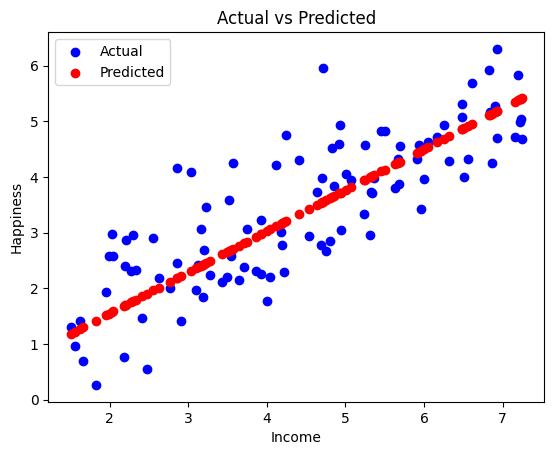

In [2]:
#Income dataset -SLR with GD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_name = 'income.csv'  # Change to your file name
data = pd.read_csv(file_name)

# Assuming the dataset has columns 'income' (independent variable) and 'happiness' (dependent variable)
X = data[['income']].values
y = data['happiness'].values

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 1000

# Initialize weights (theta) randomly
theta = np.random.randn(X_train.shape[1])

# Gradient Descent
for iteration in range(n_iterations):
    gradients = -2 / len(X_train) * X_train.T.dot(y_train - X_train.dot(theta))
    theta -= learning_rate * gradients

# Predictions
y_pred = X_test.dot(theta)

# Calculate metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print regression coefficients and metrics
print(f'Regression Coefficients (Theta): {theta[1:]}')
print(f'Intercept: {theta[0]}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score (Model Accuracy): {r2}')

# New instances for prediction
X_new = np.array([[5], [10]])
X_new = np.c_[np.ones(X_new.shape[0]), X_new]  # Add intercept term
y_new_pred = X_new.dot(theta)

# Print predictions for new instances
print(f'\nNew Instances X: {X_new[:, 1]}')
print(f'Predicted Output YHAT: {y_new_pred}')

# Calculate additional metrics for new instances
# Get the mean of actual y values from the original dataset
y_mean = np.mean(y)

# Calculate YHAT - Y and squared errors for new instances
y_new_errors = y_new_pred - y_mean
squared_errors_new = y_new_errors ** 2
average_squared_error = np.mean(squared_errors_new)

print(f'YHAT - Y for new instances: {y_new_errors}')
print(f'Square (YHAT - Y) for new instances: {squared_errors_new}')
print(f'Average (Sum (Square (YHAT - Y))): {average_squared_error}')

# Plot actual vs predicted values
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


Regression Coefficient (yrs.service): 921.8256966281236
Intercept: 97624.92743637862
Mean Squared Error: 854204000.7503502
R2 Score (Model Accuracy): -0.11213785398412224

New Instances X (yrs.service): [ 5 10]
Predicted Output YHAT (salary): [102234.05591952 106843.18440266]
Mean of Actual Y Values: 113706.45843828715
YHAT - Y for new instances: [-11472.40251877  -6863.27403563]
Square (YHAT - Y) for new instances: [1.31616020e+08 4.71045305e+07]
Average (Sum (Square (YHAT - Y))): 89360275.02037403


C:\Users\VIKAS KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


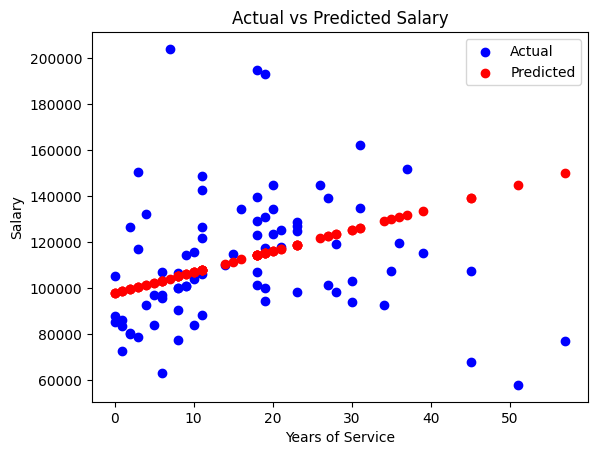

In [8]:
#Salaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_name = 'Salaries.csv'  # Change to your file name
data = pd.read_csv(file_name)

# Define features and target variable
X = data[['yrs.service']]
y = data['salary']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print regression coefficients and metrics
print(f'Regression Coefficient (yrs.service): {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score (Model Accuracy): {r2}')

# New instances for prediction
X_new = np.array([[5], [10]])  # Replace with your new instances
y_new_pred = model.predict(X_new)

# Print predictions for new instances
print(f'\nNew Instances X (yrs.service): {X_new.flatten()}')
print(f'Predicted Output YHAT (salary): {y_new_pred}')

# Calculate additional metrics for new instances
# Get the mean of actual y values from the original dataset
y_mean = np.mean(y)
print(f"Mean of Actual Y Values: {y_mean}")

#Calculate YHAT - Y and squared errors for new instances
y_new_errors = y_new_pred - y_mean
squared_errors_new = y_new_errors ** 2
average_squared_error = np.mean(squared_errors_new)

print(f'YHAT - Y for new instances: {y_new_errors}')
print(f'Square (YHAT - Y) for new instances: {squared_errors_new}')
print(f'Average (Sum (Square (YHAT - Y))): {average_squared_error}')

# Plot actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Years of Service')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()


In [15]:
#boston house price dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_name = 'Salaries.csv'  # Change to your file name
data = pd.read_csv(file_name)

# Check for NaN values
print("Checking for NaN values in the dataset:")
print(data.isna().sum())

# Define features and target variable
X = data[['yrs.service']]
y = data['salary']

# Convert to numeric if needed
X = pd.to_numeric(X.squeeze(), errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop rows with NaN values (or you can choose to impute them)
data_cleaned = pd.concat([X, y], axis=1).dropna()
X_cleaned = data_cleaned[['yrs.service']]
y_cleaned = data_cleaned['salary']

# Convert to numpy arrays
X_cleaned = X_cleaned.values.reshape(-1, 1)
y_cleaned = y_cleaned.values

# Add a column of ones to X for the intercept term
X_cleaned = np.c_[np.ones(X_cleaned.shape[0]), X_cleaned]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 1000

# Initialize weights (theta) randomly
theta = np.random.randn(X_train.shape[1])

# Gradient Descent
for iteration in range(n_iterations):
    predictions = X_train.dot(theta)
    errors = y_train - predictions
    gradients = -2 / len(X_train) * X_train.T.dot(errors)
    theta -= learning_rate * gradients

# Predict on the test set
y_pred = X_test.dot(theta)

# Check for NaN values in predictions
if np.any(np.isnan(y_pred)):
    print("NaN values found in predictions. Please check the calculations.")
    print(f"Predictions: {y_pred}")
else:
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print regression coefficients and metrics
    print(f'Regression Coefficient (yrs.service): {theta[1]}')
    print(f'Intercept: {theta[0]}')
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score (Model Accuracy): {r2}')

    # New instances for prediction
    X_new = np.array([[5], [10]])
    X_new = np.c_[np.ones(X_new.shape[0]), X_new]  # Add intercept term
    y_new_pred = X_new.dot(theta)

    # Print predictions for new instances
    print(f'\nNew Instances X (yrs.service): {X_new[:, 1]}')
    print(f'Predicted Output YHAT (salary): {y_new_pred}')

    # Calculate additional metrics for new instances
    # Get the mean of actual y values from the original dataset
    y_mean = np.mean(y_cleaned)
    print(f"Mean of Actual Y Values: {y_mean}")

    # Calculate YHAT - Y and squared errors for new instances
    y_new_errors = y_new_pred - y_mean
    squared_errors_new = y_new_errors ** 2
    average_squared_error = np.mean(squared_errors_new)

    print(f'YHAT - Y for new instances: {y_new_errors}')
    print(f'Square (YHAT - Y) for new instances: {squared_errors_new}')
    print(f'Average (Sum (Square (YHAT - Y))): {average_squared_error}')

    # Plot actual vs predicted values
    plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
    plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted')
    plt.xlabel('Years of Service')
    plt.ylabel('Salary')
    plt.title('Actual vs Predicted Salary')
    plt.legend()
    plt.show()


Checking for NaN values in the dataset:
Unnamed: 0       0
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64
NaN values found in predictions. Please check the calculations.
Predictions: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
